In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('election2024.csv')

In [3]:
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [5]:
df.tail()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
1595,0716b23c2c0cee3a,male,61.0,central,settlement,named correct date,definitely no,will not take part,over 4 hours a day,less than 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.270761
1596,07168254d14ceb55,female,80.0,volga,village,named correct date,likely yes,struggle to answer,several times a week,does not use internet,college,hard to say,unemployed pensioner,NaN,NaN,0.921724
1597,071690f34d4ce164,female,76.0,northwestern,city with population of 50-100k,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.396691
1598,0716bfa9c48ce79a,female,74.0,central,city with population of less than 50k,not sure or no answer,definitely yes,Putin,over 4 hours a day,over 4 hours a day,academic degree,hard to say,employed pensioner,commercial organization,"industry, manufacturing",0.995849
1599,07168088318cef88,female,76.0,ural,village,named correct date,definitely yes,Putin,over 4 hours a day,over 4 hours a day,school,hard to say,unemployed pensioner,NaN,NaN,0.860836


In [6]:
df.describe()

,age,weight1
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


In [7]:
df.isnull().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [8]:
df['job_type'].fillna('Unknown', inplace=True)

In [9]:
df['company_type'].fillna('Unknown', inplace=True)

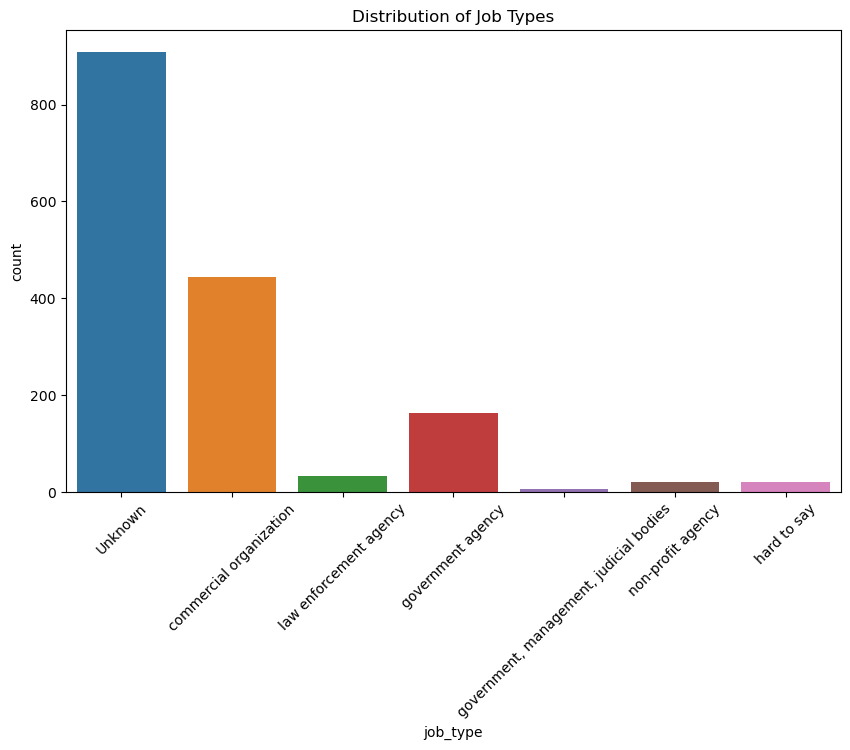

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='job_type', data=df)
plt.title('Distribution of Job Types')
plt.xticks(rotation=45)
plt.show()

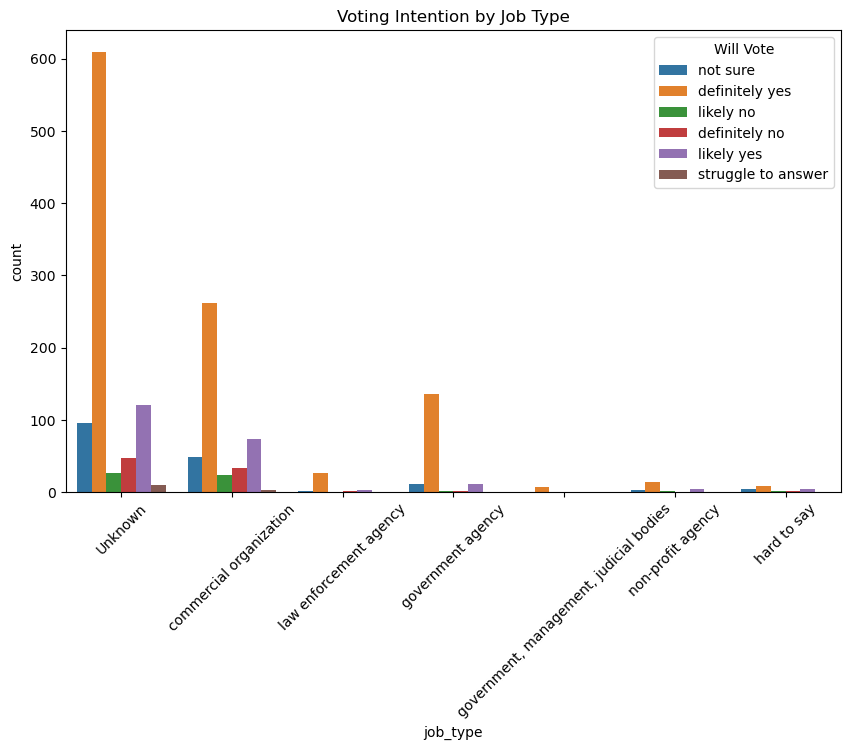

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='job_type', hue='will_vote', data=df)
plt.title('Voting Intention by Job Type')
plt.xticks(rotation=45)
plt.legend(title='Will Vote', loc='upper right')
plt.show()

/tmp/ipykernel_77/3049959293.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


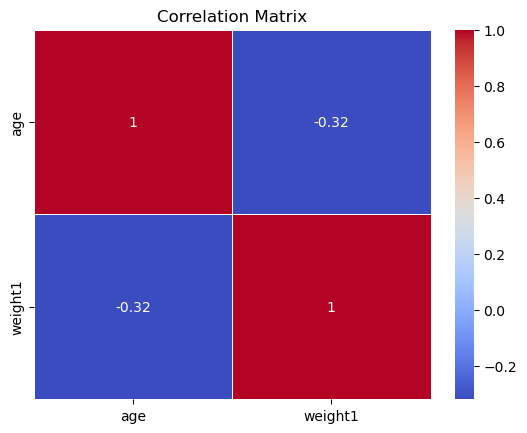

In [12]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

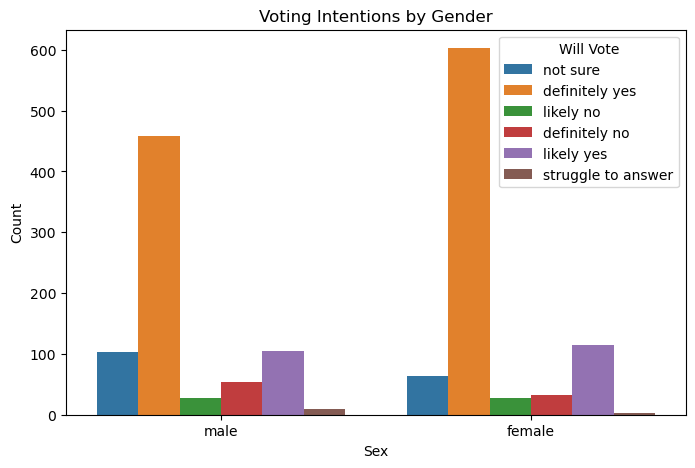

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', hue='will_vote', data=df)
plt.title('Voting Intentions by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Will Vote', loc='upper right')
plt.show()

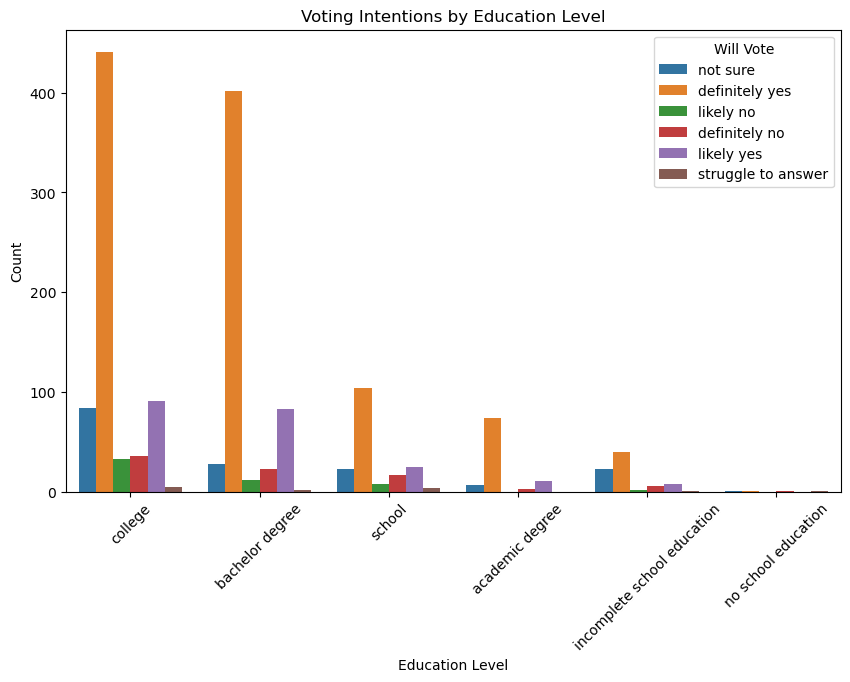

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='will_vote', data=df, order=df['education'].value_counts().index)
plt.title('Voting Intentions by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Will Vote', loc='upper right')
plt.show()